# Shruti Kharote Wadalkar

Task 2 : Prediction using Unsupervised machine Learning 

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [7]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

#Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


How do you find the optimum number of clusters for K Means? How does one determine the value of K

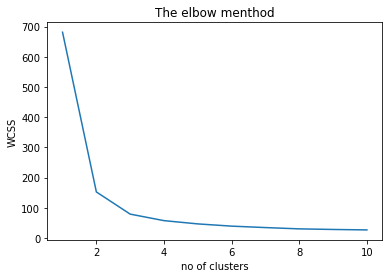

In [12]:
#Finding the optimum number of clusters for k-mean classification

x = iris_df.iloc[:,[0, 1, 2, 3]].values

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', max_iter= 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    #Plotting  the results onto a line graph,
    #allowing us to observe 'The elbow'
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow menthod')
plt.xlabel('no of clusters')
plt.ylabel('WCSS') #Within clusters sum of squres
plt.show()

You can clearly see why it is called 'The elbow method' from above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesnt decrease significantly with every iteration.

From this we choose the number of clusters as '3'

In [20]:
#applying kmeans to the dataset/ Creating K mean classifier

kmeans = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

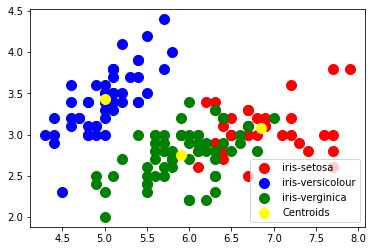

In [24]:
#Visualising the clusters on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = 'iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],
           s = 100, c = 'green', label = 'iris-verginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

#Thank you